# **Predict Used Home Price in Chile**

### Create a model to predict used home prices in Región Metropolitana, Chile

#### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import missingno as msno
from sklearn.impute import SimpleImputer

### **Reading dataframe**

In [2]:
df = pd.read_excel('./data/Casas usadas - RM Mayo 2020.xlsx')

In [3]:
df.columns

Index(['Comuna', 'Link', 'Tipo_Vivienda', 'N_Habitaciones', 'N_Baños',
       'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2',
       'Valor_UF', 'Valor_CLP', 'Dirección', 'Quién_Vende', 'Corredor'],
      dtype='object')

### **Exploring Data Frame**

In [4]:
df.head()

,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
0,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,6.0,3,5000.0,440,12200.0,351360000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
1,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,6,5000.0,430,13000.0,374400000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
2,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027.0,140,10300.0,296640000,"Calera de Tango, Avenida calera de tango con...",Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
3,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,6.0,No,5000.0,480,21500.0,619200000,"Calera de Tango, Paradero 14 1/2/5 kilometros ...",RED Gestión Propiedades,Red Gestión Propiedades
4,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,3,5000.0,196,9100.0,262080000,"Calera de Tango, Condominio El Trébol de Caler...",Gabriela Mellado V.,Zenpro Propiedades


In [5]:
df.describe()

,N_Habitaciones,N_Baños,Total_Superficie_M2,Valor_UF,Valor_CLP
count,1131.000000,1118.000000,1102.000000,1139.000000,1.139000e+03
mean,4.109637,2.652952,866.097541,10218.017252,2.942870e+08
std,1.602654,1.394241,1845.360199,9652.728522,2.779984e+08
min,1.000000,1.000000,0.000000,1215.193389,3.500000e+07
25%,3.000000,2.000000,180.000000,3541.420735,1.020000e+08
50%,4.000000,2.000000,293.000000,6700.000000,1.929600e+08
75%,5.000000,3.000000,563.750000,13510.000000,3.890880e+08
max,19.000000,12.000000,30000.000000,70828.414693,2.040000e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Baños                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   object 
 6   Total_Superficie_M2       1102 non-null   float64
 7   Superficie_Construida_M2  1103 non-null   object 
 8   Valor_UF                  1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 115.8+ KB


### **Missing Values**

<Axes: >

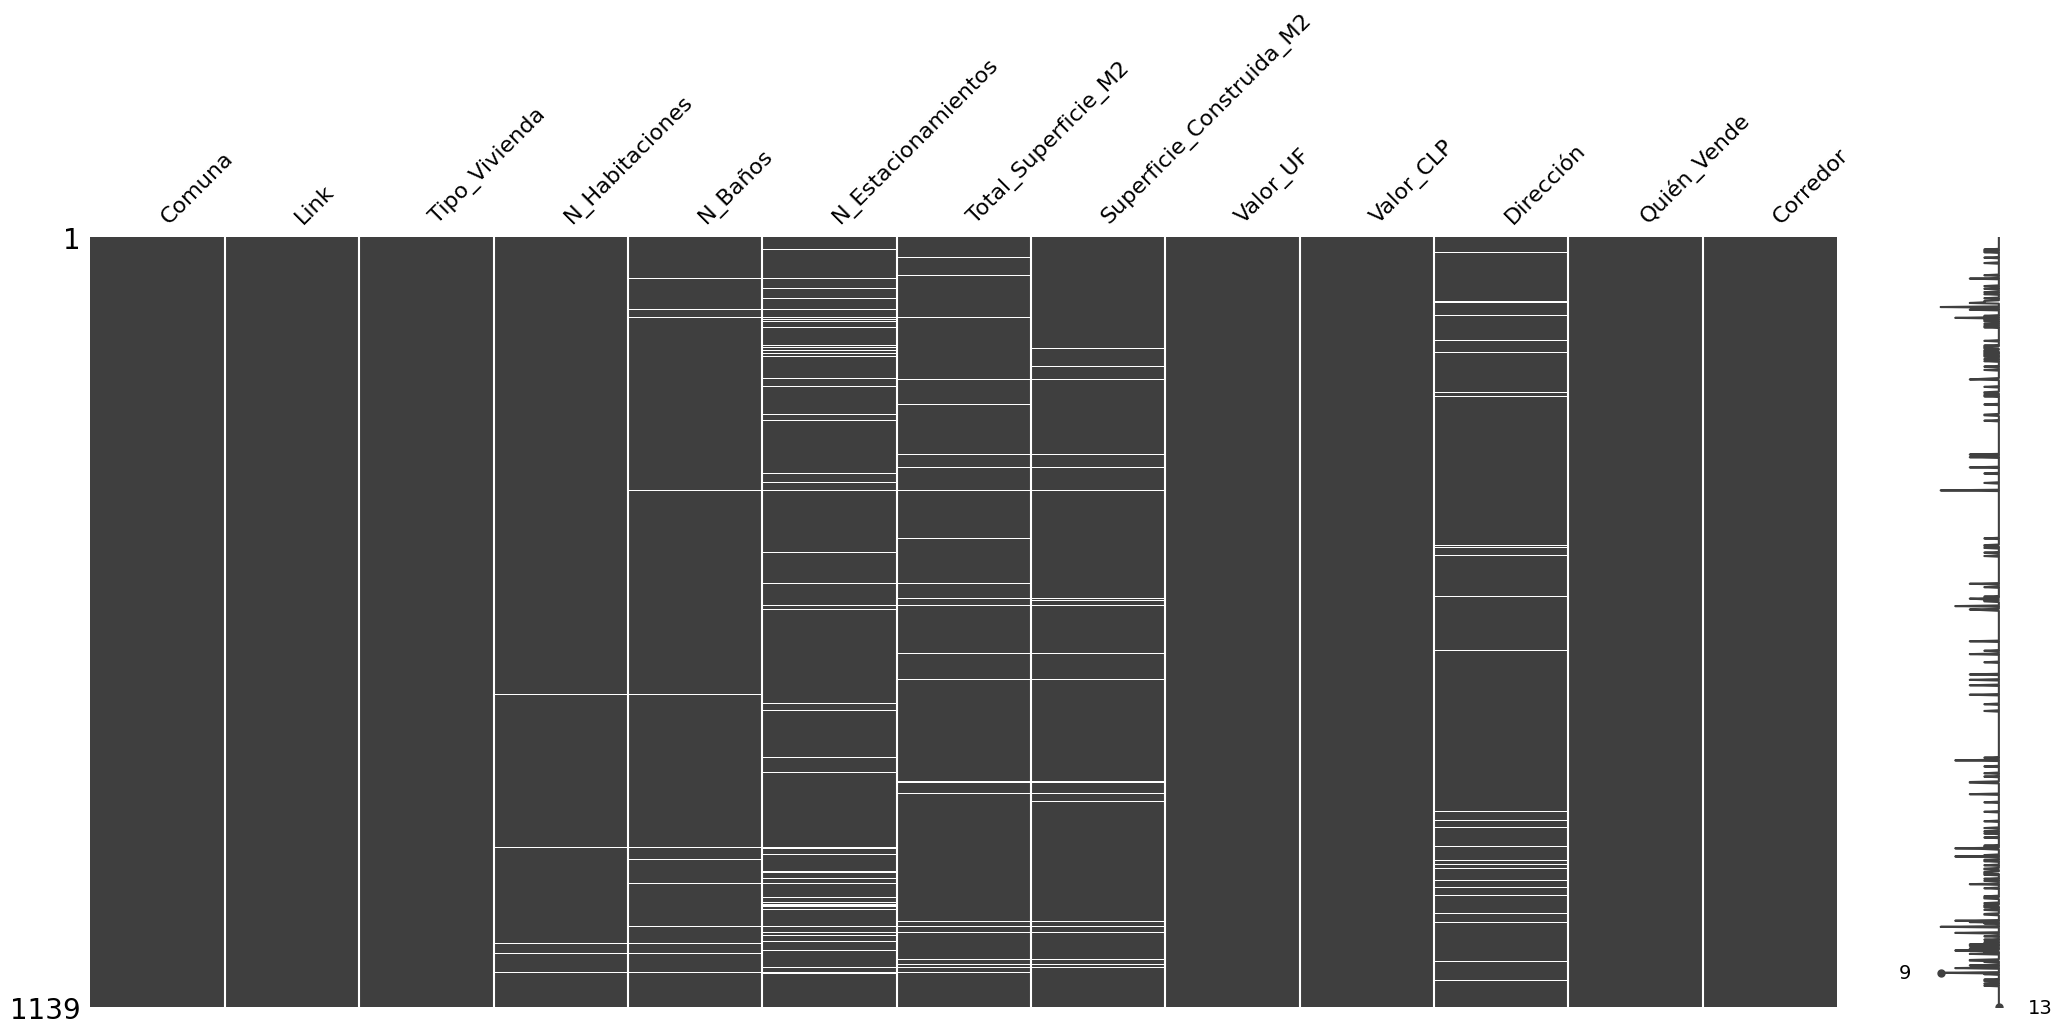

In [7]:
msno.matrix(df)

In [8]:
df.isnull().sum().sort_values(ascending=False)

N_Estacionamientos          72
Total_Superficie_M2         37
Dirección                   37
Superficie_Construida_M2    36
N_Baños                     21
N_Habitaciones               8
Comuna                       0
Link                         0
Tipo_Vivienda                0
Valor_UF                     0
Valor_CLP                    0
Quién_Vende                  0
Corredor                     0
dtype: int64

In [9]:
df.describe()

,N_Habitaciones,N_Baños,Total_Superficie_M2,Valor_UF,Valor_CLP
count,1131.000000,1118.000000,1102.000000,1139.000000,1.139000e+03
mean,4.109637,2.652952,866.097541,10218.017252,2.942870e+08
std,1.602654,1.394241,1845.360199,9652.728522,2.779984e+08
min,1.000000,1.000000,0.000000,1215.193389,3.500000e+07
25%,3.000000,2.000000,180.000000,3541.420735,1.020000e+08
50%,4.000000,2.000000,293.000000,6700.000000,1.929600e+08
75%,5.000000,3.000000,563.750000,13510.000000,3.890880e+08
max,19.000000,12.000000,30000.000000,70828.414693,2.040000e+09


### **Dropping not relevant columns**

Feature called 'Tipo_Vivienda' has a unique value. This is a no sigificant feature to the model.

In [10]:
df.drop(['Tipo_Vivienda'], axis=1, inplace=True)

Feature called 'Link' is not relevant to the analysis.

In [11]:
df.drop(['Link'], axis=1, inplace=True)

Feature called 'Dirección' is similar to an ID or index, and is not relevant to a numeric analysis.

In [12]:
df.drop(['Dirección'], axis=1, inplace=True)

Feauture called 'Valor_UF' is similar to 'Valor_CLP and is not relevant to the model

In [13]:
df.drop(['Valor_UF'], axis=1, inplace=True)

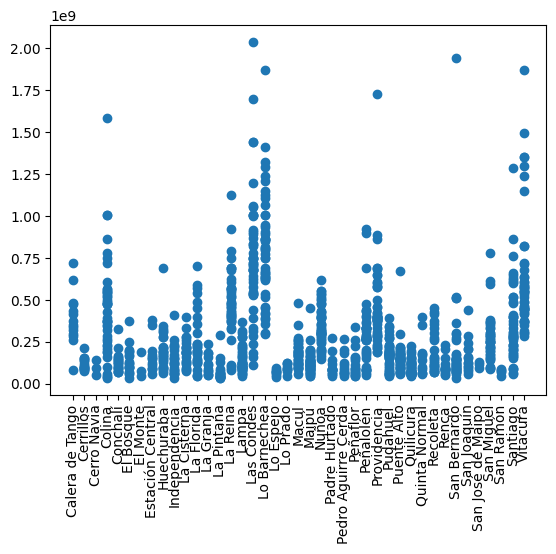

In [14]:
plt.scatter(x=df['Comuna'], y=df['Valor_CLP'])
plt.xticks(rotation=90)
plt.show()

## **Create new columns and drop columns**

Quién_Vende and Corredor are the same categorical info and they aren't relevant to the numeric analysis.

Instead we are going to create some new features.

Mean Price by Seller

Mean Price by Comuna (Municipality)

In [15]:
# Calculate mean price by Seller
names = []
mean_price = []
for name in df['Quién_Vende'].unique():
    names.append(name)
    mean_price.append(df[(df['Quién_Vende'] == name)].Valor_CLP.mean())

dict_quien_vende = {'Names_Quien_Vende': names, 'Mean_Prices': mean_price}
df_quien_vende = pd.DataFrame(dict_quien_vende)


# Add a new column with the mean price
mean_prices_by_seller = []

for name in list(df['Quién_Vende'].values):
    index = list(df_quien_vende['Names_Quien_Vende'].values).index(name)
    mean_prices_by_seller.append(df_quien_vende['Mean_Prices'][index])

df['Mean_Price_by_Seller'] = mean_prices_by_seller


Eliminate Quién_Vende and Corredor

In [16]:
df.drop(['Quién_Vende', 'Corredor'], axis=1, inplace=True)
df

,Comuna,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_CLP,Mean_Price_by_Seller
0,Calera de Tango,5.0,6.0,3,5000.0,440,351360000,3.307200e+08
1,Calera de Tango,6.0,6.0,6,5000.0,430,374400000,3.307200e+08
2,Calera de Tango,3.0,3.0,No,2027.0,140,296640000,6.405700e+08
3,Calera de Tango,8.0,6.0,No,5000.0,480,619200000,2.979783e+08
4,Calera de Tango,3.0,2.0,3,5000.0,196,262080000,3.307200e+08
...,...,...,...,...,...,...,...,...
1134,Vitacura,4.0,3.0,No,389.0,211,576000000,5.104606e+08
1135,Vitacura,3.0,2.0,No,325.0,120,633600000,7.731600e+08
1136,Vitacura,6.0,3.0,No,638.0,242,573120000,2.979783e+08
1137,Vitacura,5.0,3.0,No,338.0,230,532800000,2.979783e+08


In [17]:
# Calculate mean price by Comuna
comunas = []
mean_price = []
for comuna in df['Comuna'].unique():
    comunas.append(comuna)
    mean_price.append(df[(df['Comuna'] == comuna)].Valor_CLP.mean())

dict_comunas = {'Comunas': comunas, 'Mean_Prices': mean_price}
df_comunas = pd.DataFrame(dict_comunas)


# Add a new column with the mean price
mean_prices_by_comuna = []

for comuna in list(df['Comuna'].values):
    index = list(df_comunas['Comunas'].values).index(comuna)
    mean_prices_by_comuna.append(df_comunas['Mean_Prices'][index])

df['Mean_Price_by_Comuna'] = mean_prices_by_comuna

In [18]:
df.head()

,Comuna,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_CLP,Mean_Price_by_Seller,Mean_Price_by_Comuna
0,Calera de Tango,5.0,6.0,3,5000.0,440,351360000,3.307200e+08,3.894359e+08
1,Calera de Tango,6.0,6.0,6,5000.0,430,374400000,3.307200e+08,3.894359e+08
2,Calera de Tango,3.0,3.0,No,2027.0,140,296640000,6.405700e+08,3.894359e+08
3,Calera de Tango,8.0,6.0,No,5000.0,480,619200000,2.979783e+08,3.894359e+08
4,Calera de Tango,3.0,2.0,3,5000.0,196,262080000,3.307200e+08,3.894359e+08


In [19]:
df.drop(['Comuna'], axis=1, inplace=True)

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1138
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Habitaciones            1023 non-null   float64
 1   N_Baños                   1023 non-null   float64
 2   N_Estacionamientos        1023 non-null   object 
 3   Total_Superficie_M2       1023 non-null   float64
 4   Superficie_Construida_M2  1023 non-null   object 
 5   Valor_CLP                 1023 non-null   int64  
 6   Mean_Price_by_Seller      1023 non-null   float64
 7   Mean_Price_by_Comuna      1023 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 71.9+ KB


In [22]:
def no_to_0(value):
    if value == 'No':
        value = 0
    return value

N_Estacionamientos = df.N_Estacionamientos.apply(lambda x: no_to_0(x))

In [23]:
df.N_Estacionamientos = N_Estacionamientos

In [24]:
df.N_Estacionamientos.value_counts()

N_Estacionamientos
0     591
2     164
1     106
3      73
4      45
8      17
5      13
6      10
7       3
10      1
Name: count, dtype: int64

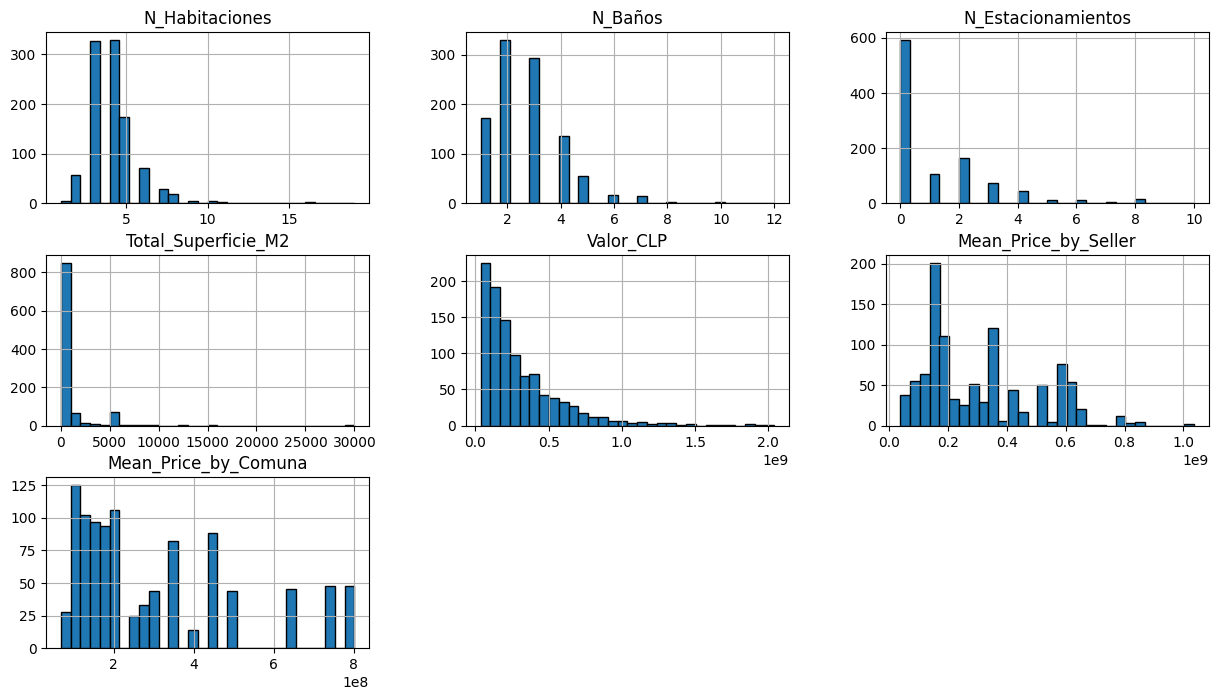

In [25]:
df.hist(figsize=(15,8), bins=30, edgecolor='black')
plt.show()

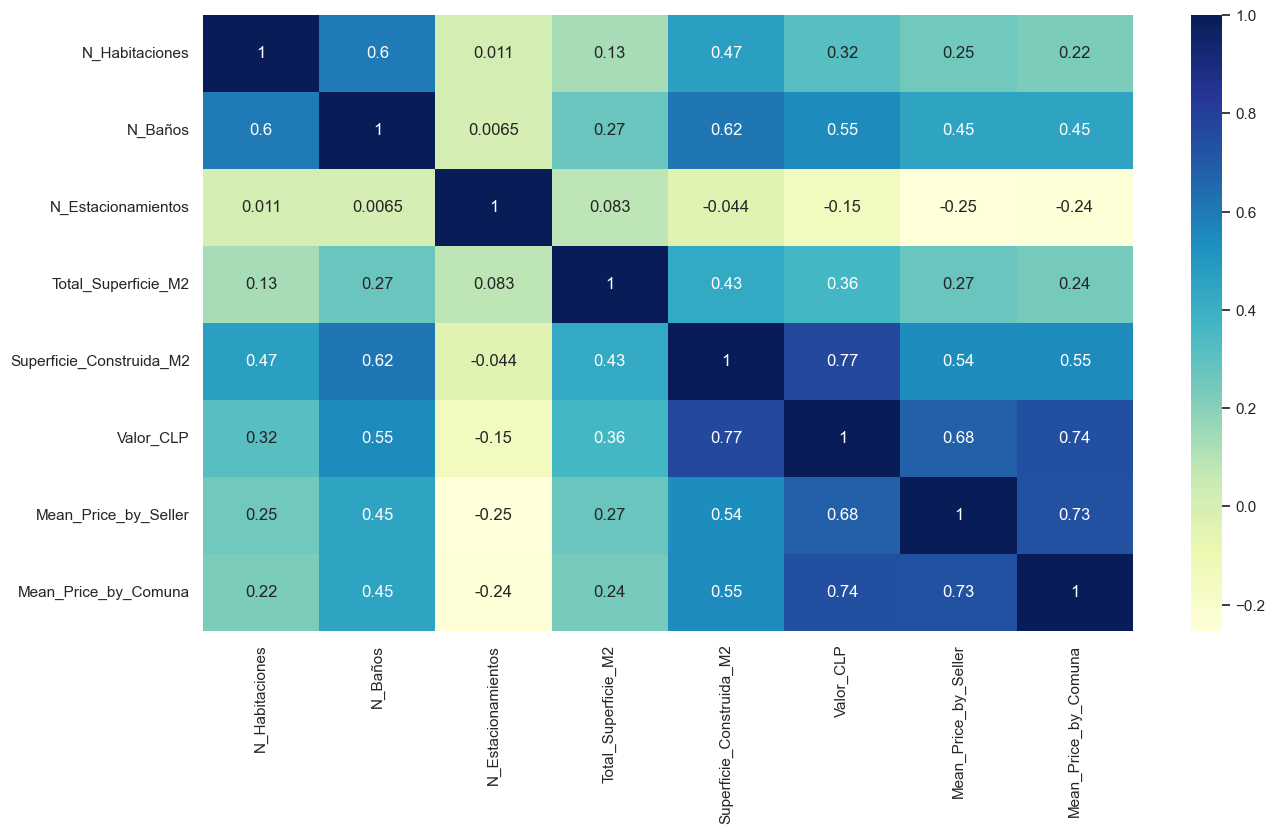

In [26]:
sns.set(rc={'figure.figsize': (15,8)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [27]:
df.columns

Index(['N_Habitaciones', 'N_Baños', 'N_Estacionamientos',
       'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_CLP',
       'Mean_Price_by_Seller', 'Mean_Price_by_Comuna'],
      dtype='object')

## **Models without scaling data**

In [28]:
# Separate between X and y
X_all_ft = df.drop(['Valor_CLP'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_all_ft, target, test_size=.2)

# Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled_dif_feat = scaler.fit_transform(X_train_dif_feat)
# X_test_scaled_dif_feat = scaler.fit_transform(X_test_dif_feat)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, target_train)

# Scores
print('Scores')
print(model.score(X_train, target_train))
print(model.score(X_test, target_test))

# Predicting
predictions = model.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7685476786863046
0.6771540985494537


,Prediction,Actual value
622,1.088596e+08,141120000
438,7.661662e+08,936000000
29,8.341324e+07,144000000
268,5.459856e+08,486720000
752,1.910747e+08,270720000
...,...,...
42,6.612671e+08,475200000
655,3.470631e+08,330000000
412,9.022545e+08,864000000
519,6.697631e+07,105000000


In [29]:
# Separate between X and y
X_ = df.drop(['Valor_CLP', 'N_Estacionamientos'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_, target, test_size=.2)

# Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled_dif_feat = scaler.fit_transform(X_train_dif_feat)
# X_test_scaled_dif_feat = scaler.fit_transform(X_test_dif_feat)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, target_train)

# Scores
print('Scores')
print(model.score(X_train, target_train))
print(model.score(X_test, target_test))

# Predicting
predictions = model.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7359015532999362
0.7951538501369723


,Prediction,Actual value
109,1.139047e+08,167184000
389,6.736652e+08,820512000
929,4.249142e+07,59000000
555,1.557378e+08,260000000
378,7.485848e+08,892800000
...,...,...
790,9.582967e+07,57000000
800,1.805503e+08,152682400
524,1.772661e+08,120000000
539,9.090910e+07,170000000


In [30]:
# Separate between X and y
X_0 = df.drop(['Valor_CLP', 'N_Estacionamientos', 'N_Habitaciones'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_0, target, test_size=.2)

# Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled_dif_feat = scaler.fit_transform(X_train_dif_feat)
# X_test_scaled_dif_feat = scaler.fit_transform(X_test_dif_feat)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, target_train)

# Scores
print('Scores')
print(model.score(X_train, target_train))
print(model.score(X_test, target_test))

# Predicting
predictions = model.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7396209490473109
0.7743553297048658


,Prediction,Actual value
82,5.658089e+07,98000000
1088,3.104424e+08,374400000
471,1.336733e+08,175000000
803,2.006357e+08,180000000
369,7.028604e+08,640800000
...,...,...
850,5.254192e+07,65000000
756,2.429461e+08,336000000
1007,1.632290e+08,148500000
696,3.182941e+08,397440000


In [31]:
# Separate between X and y
X_1 = df.drop(['Valor_CLP', 'N_Estacionamientos', 'N_Habitaciones', 'Total_Superficie_M2'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_1, target, test_size=.2)

# Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled_dif_feat = scaler.fit_transform(X_train_dif_feat)
# X_test_scaled_dif_feat = scaler.fit_transform(X_test_dif_feat)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, target_train)

# Scores
print('Scores')
print(model.score(X_train, target_train))
print(model.score(X_test, target_test))

# Predicting
predictions = model.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7399931766271151
0.7655869290975847


,Prediction,Actual value
670,3.454754e+08,331200000
79,1.089449e+08,115000000
658,3.755251e+08,403200000
793,7.694247e+07,67000000
500,2.455357e+08,210240000
...,...,...
870,2.546970e+07,60000000
832,1.927866e+08,169967200
71,5.021475e+08,388512000
68,7.465260e+08,342432000


## **Creating models with scaled data**

In [32]:
# Separate between X and y
X = df.drop(['Valor_CLP'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model.score(X_train_scaled, target_train))
print(model.score(X_test_scaled, target_test))

# Predicting
predictions = model.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7366763058974908
0.7897290690657901


,Prediction,Actual value
617,9.088195e+07,80000000
668,3.483920e+08,367200000
413,1.338902e+09,1872000000
897,4.519500e+08,175000000
966,7.082841e+08,512640000
...,...,...
788,1.874677e+08,91900000
218,1.870663e+08,216000000
781,2.205727e+08,288000000
292,6.833805e+08,530000000


In [33]:
# Separate between X and y
X_ = df.drop(['Valor_CLP','N_Estacionamientos'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model.score(X_train_scaled, target_train))
print(model.score(X_test_scaled, target_test))

# Predicting
predictions = model.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7677829348221772
0.6636339680647922


,Prediction,Actual value
302,4.980588e+08,561312000
54,6.042807e+08,519148800
712,2.618908e+08,230000000
815,2.483303e+08,175728800
239,1.618033e+08,180000000
...,...,...
638,3.431247e+07,48000000
661,3.994709e+08,432000000
757,1.658398e+08,152640000
1136,5.045701e+08,573120000


In [34]:
# Separate between X and y
X_0 = df.drop(['Valor_CLP','N_Estacionamientos', 'N_Habitaciones'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_0, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model.score(X_train_scaled, target_train))
print(model.score(X_test_scaled, target_test))

# Predicting
predictions = model.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7694188584995553
0.6429771494345312


,Prediction,Actual value
731,3.726869e+08,371520000
736,4.138475e+08,280000000
593,1.782311e+08,198720000
834,2.038005e+08,197000000
301,4.925908e+08,417600000
...,...,...
1037,2.324003e+08,330000000
362,8.450652e+08,834912000
317,8.804833e+07,97920000
397,7.633134e+08,720000000


In [35]:
# Separate between X and y
X_1 = df.drop(['Valor_CLP','N_Estacionamientos', 'N_Habitaciones', 'Total_Superficie_M2'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_1, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model.score(X_train_scaled, target_train))
print(model.score(X_test_scaled, target_test))

# Predicting
predictions = model.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7491561474799623
0.69504218825944


,Prediction,Actual value
217,2.064989e+08,140000000
813,2.047897e+08,148000000
248,2.483504e+08,180000000
983,1.490635e+08,110000000
921,2.759386e+08,415000000
...,...,...
888,3.636760e+07,42900000
568,4.668241e+08,518400000
608,1.576877e+08,88000000
625,3.319489e+08,120000000


## **Results**

Best score's model was without 'N_Estacionamientos' feature and with no scaled data.

To obtain best scores, we need to acquire more data and try with another algorithmics.